## Develop data management class

In [17]:
%matplotlib inline
from importlib import reload
import data_management 
reload(data_management)
from astropy.coordinates import SkyCoord

In [18]:
class Bar(object):
    def __init__(self, name=None, **kwargs):
        self.__dict__.update(kwargs)
        if name :
            sc = SkyCoord.from_name(name).galactic
            self.__dict__.update(l=sc.l.value, b=sc.b.value)          

data = data_management.Data(Bar('Geminga', mjd_range=(54750, 54950), interval=5))

From MJD range [54750. 54950.] select years [0 2], months [1 9]
Processing 2 GTI files ...  2 files, 11712 intervals with 604 days live time
	cut from 11,712 to 1029 - 4045, or 3,016 entries after MJD range selection
	GTI MjD range: 54750.00-54950.03, good fraction 0.82 
Processing 2 S/C history (FT2) files
	Found 472,463 S/C entries:  147,899 remain after zenith and theta cuts
	cut from 147,899 to 0 - 147839, or 147,839 entries after MJD range selection
Loading data from 8 months x.......
	Selected 88187 photons within 5 deg of  (195.13,4.27)
	Dates: 2008-10-11 00:41 - 2009-04-29 00:37
	MJD  : 54750.0          - 54950.0         
not checking photons for time in bin


In [20]:
cc = data.count_binner() 

Binning: 40 intervals of 5 days fronm 54750.03 to 54950.03


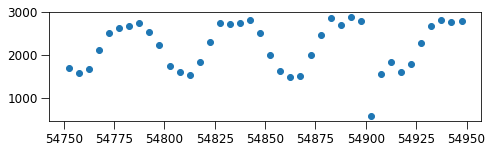

In [22]:
fig, ax= plt.subplots(figsize=(8,2))
ax.plot(cc.time,cc.counts, 'o');

In [26]:
bins, exposure = data.binner()
w = data.photon_data.weight
good = np.logical_not(np.isnan(w))
photons = data.photon_data.loc[good]

edges = np.searchsorted(photons.time, bins)
fig, ax= plt.subplots(figsize=(8,2))
ax.plot(np.diff(edges), 'o');



Binning: 40 intervals of 5 days fronm 54750.03 to 54950.03


AttributeError: 'DataFrame' object has no attribute 'weight'

### Add weights as generated by a pointlike analysis of the ROI containing this source

In [64]:
wtd= data.add_weights('../data/geminga_weights.pkl')
vals = [wtd[k] for k in 'model_name roi_name source_name source_lb '.split()]
lbformat = lambda lb: '{:.2f}, {:.2f}'.format(*lb)
model_info='\n  {}\n  {}\n  {}\n  {}'.format(vals[0], vals[1], vals[2], lbformat(vals[3]))

Adding weights from file /nfs/farm/g/glast/u/burnett/analysis/lat_timing/data/geminga_weights.pkl
	12 / 52215 photon pixels are outside weight region
	8302 weights set to NaN


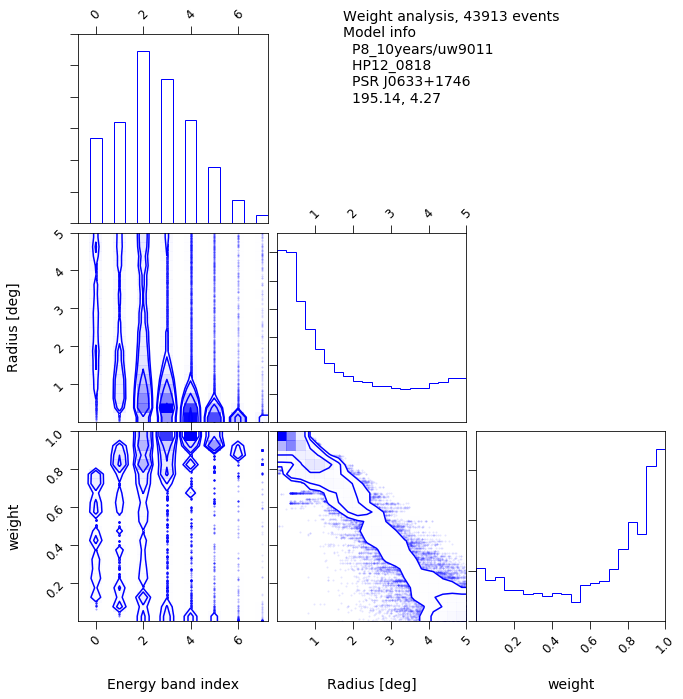

In [65]:
gd = data.photon_data
gd.loc[:,'eband']=(gd.band.values//2).clip(0,7)

ok = np.logical_not(pd.isna(gd.weight))
gdok = gd.loc[ok,:]

fig, axx=plt.subplots(3,3, figsize=(10,10))
corner.corner(gdok['eband radius weight'.split()], 
              range=[(-0.75,7.25),(0,5),(0,1)],
              bins=(16,20,20),
              label_kwargs=dict(fontsize=14), 
              labels=['Energy band index', 'Radius [deg]', 'weight'],
              show_titles=False, top_ticks=True, color='blue', fig=fig);
fig.set_edgecolor('white')

fig.suptitle(f'Weight analysis, {len(gdok)} events\nModel info'+model_info,
             fontsize=14, ha='left',
            #fontproperties=dict(family='monospace'), #didn't work
            );